In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/life-expectancy-data/Life Expectancy Data (3).csv


In [2]:
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# import all libraries and dependencies for machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import random

In [4]:
#loading the data
df = pd.read_csv("../input/life-expectancy-data/Life Expectancy Data (3).csv")

In [5]:
#understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [8]:
num_col = df.select_dtypes(include = np.number).columns
print("Numerical columns:\n",num_col)
cat_col = df.select_dtypes(exclude = np.number).columns
print("Categorical columns:\n",cat_col)

Numerical columns:
 Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')
Categorical columns:
 Index(['Country', 'Status'], dtype='object')


In [9]:
#Remove the extra space from columns names
df = df.rename(columns=lambda x:x.strip())
print(df)

          Country  Year      Status  Life expectancy  Adult Mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  \
0                62     0.01               71

In [10]:
#import label encoder
from sklearn import preprocessing

#lable_encoder object knows how to understand word labels
label_encoder = preprocessing.LabelEncoder()

#Encoder labels in column 'status'
df['Status'] = label_encoder.fit_transform(df['Status'])
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [11]:
print(df.isna().sum())
print(df.shape)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64
(2938, 22)


In [12]:
#Replace using mean
for i in df.columns.drop('Country'):
    df[i].fillna(df[i].mean(),inplace = True)

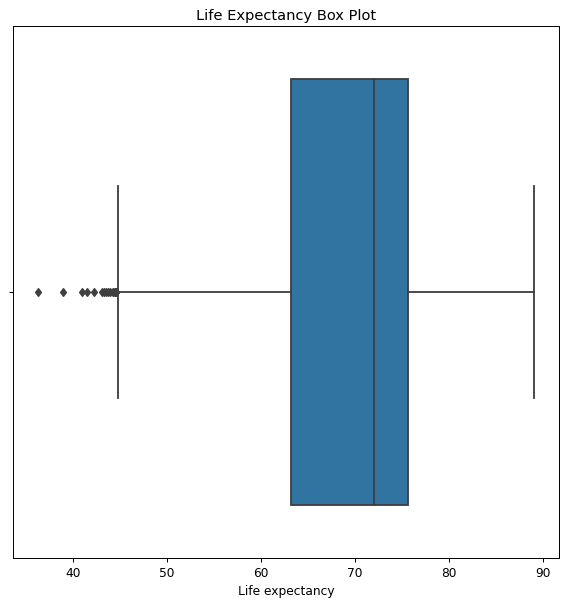

In [13]:
#Performing EDA

#Let's check the distribution of y variable i.e life expectancy
plt.figure(figsize = (8,8), dpi = 88)

sns.boxplot(df['Life expectancy'])
plt.title('Life Expectancy Box Plot')
plt.show()

The box plot gives us the information about outliers, 1st QD, median, 3rd QD

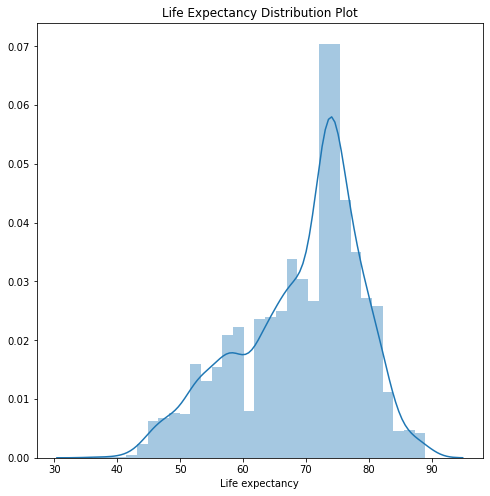

In [14]:
#For distribution of y
plt.figure(figsize = (8,8))
plt.title('Life Expectancy Distribution Plot')
sns.distplot(df['Life expectancy'])

This shows that the y variable is almost linearly distributed and have very few outliers so the assumption is met.

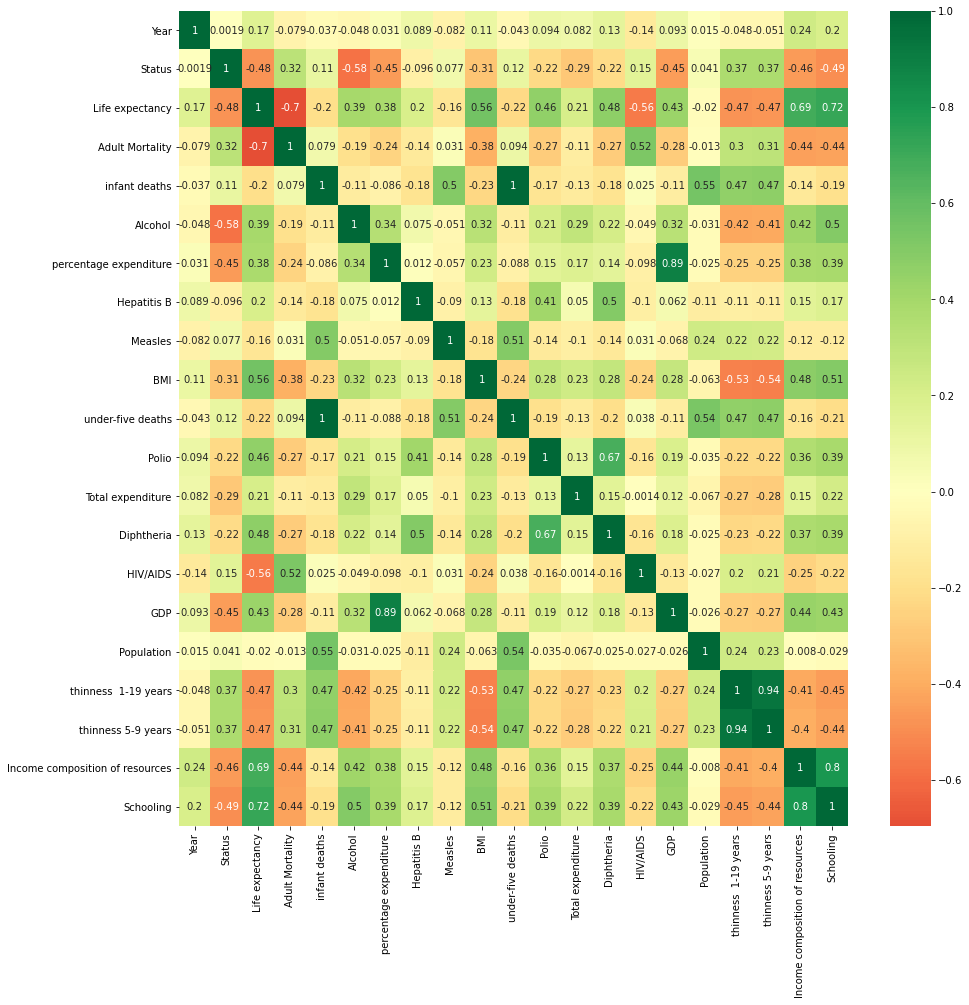

In [15]:
#Let's check the multicollinearity of features by checking the correlation matrix

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',center=0)


From the graph we have:
Life expectancy is positively correlated to 'schooling' and 'income composition'. 
Life expectancy is negatively correlated to 'adult mortality rate'.

'Income composition' feature has a strong correlation with the y variable and is linearly distributed wrt y variable hence, to start with we can consider this as a feature in model. 

In [16]:
#Model building

#Train test split
X=df.drop(columns=['Life expectancy','Country'])
y=df[['Life expectancy']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1234)

In [17]:
#Running RFE with important column count to be 15
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[('Year', False, 2),
 ('Status', True, 1),
 ('Adult Mortality', True, 1),
 ('infant deaths', True, 1),
 ('Alcohol', True, 1),
 ('percentage expenditure', False, 3),
 ('Hepatitis B', True, 1),
 ('Measles', False, 5),
 ('BMI', True, 1),
 ('under-five deaths', True, 1),
 ('Polio', True, 1),
 ('Total expenditure', True, 1),
 ('Diphtheria', True, 1),
 ('HIV/AIDS', True, 1),
 ('GDP', False, 4),
 ('Population', False, 6),
 ('thinness  1-19 years', True, 1),
 ('thinness 5-9 years', True, 1),
 ('Income composition of resources', True, 1),
 ('Schooling', True, 1)]

In [18]:
#Selecting the important features
imp_columns = X_train.columns[rfe.support_]
imp_columns

Index(['Status', 'Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B',
       'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [19]:
#Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[imp_columns]

After passing the arbitary selected columns by RFE we will manually evaluate each models p-value and VIF value. Unless we find the acceptable range for p-values and VIF
we keep dropping the variables one at a time based on below criteria.
High p-value High VIF : Drop the variable
High p-value Low VIF : Drop the variable with high p-value first
Low p-value Low VIF : accept the variable

In [20]:
random.seed(0)

In [21]:
# Add a constant
X_train_rfec = sm.add_constant(X_train_rfe)

In [22]:
#Build the model with RFE features
lm_rfe = sm.OLS(y_train,X_train_rfe).fit()

In [23]:
#Summary of Linear model
print(lm_rfe.summary())

                                 OLS Regression Results                                
Dep. Variable:        Life expectancy   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          1.164e+04
Date:                Sat, 05 Jun 2021   Prob (F-statistic):                        0.00
Time:                        10:30:28   Log-Likelihood:                         -7064.3
No. Observations:                2056   AIC:                                  1.416e+04
Df Residuals:                    2041   BIC:                                  1.424e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

Since the p value for few of the features is not siginificant, we need to drop it but before that let's check the VIF score as well


In [24]:
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
6,under-five deaths,178.16
2,infant deaths,177.70
14,Schooling,44.59
13,Income composition of resources,30.42
9,Diphtheria,30.31
7,Polio,26.28
11,thinness 1-19 years,19.47
12,thinness 5-9 years,19.31
4,Hepatitis B,19.00
5,BMI,8.28


Since the variable thinness 5-9 years is having a very high p value , we would remove the feature from training datase

In [25]:
# Dropping insignificant variables
X_train_rfe1 = X_train_rfe.drop(['thinness 5-9 years'], 1,)
# Adding a constant variable and Build a second fitted model
X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()
#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     664.7
Date:                Sat, 05 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:30:28   Log-Likelihood:                -5823.0
No. Observations:                2056   AIC:                         1.168e+04
Df Residuals:                    2041   BIC:                         1.176e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [26]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,under-five deaths,177.82
2,infant deaths,177.16
13,Schooling,44.55
12,Income composition of resources,30.42
9,Diphtheria,30.30
7,Polio,26.28
4,Hepatitis B,18.99
5,BMI,8.19
8,Total expenditure,7.74
0,Status,7.10


Since the variable under-five deaths is having a very high VIF score, we would remove the feature from training dataset


In [27]:
# Dropping insignificant variables
X_train_rfe2 = X_train_rfe1.drop('under-five deaths', 1,)
# Adding a constant variable and Build a second fitted model
X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()
#Summary of linear model
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     675.4
Date:                Sat, 05 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:30:28   Log-Likelihood:                -5872.2
No. Observations:                2056   AIC:                         1.177e+04
Df Residuals:                    2042   BIC:                         1.185e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [28]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Schooling,44.53
11,Income composition of resources,30.29
8,Diphtheria,29.80
6,Polio,26.22
4,Hepatitis B,18.76
5,BMI,8.19
7,Total expenditure,7.73
0,Status,7.06
1,Adult Mortality,4.38
3,Alcohol,4.23


Since the variable Alcohol is having a very high p value, we would remove the feature from training dataset.

In [29]:
# Dropping insignificant variables
X_train_rfe3 = X_train_rfe2.drop('Alcohol', 1,)
# Adding a constant variable and Build a second fitted model
X_train_rfe3c = sm.add_constant(X_train_rfe3)
lm_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()
#Summary of linear model
print(lm_rfe3.summary())


                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     732.0
Date:                Sat, 05 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:30:29   Log-Likelihood:                -5872.2
No. Observations:                2056   AIC:                         1.177e+04
Df Residuals:                    2043   BIC:                         1.184e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [30]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Schooling,42.11
10,Income composition of resources,30.28
7,Diphtheria,29.80
5,Polio,26.16
3,Hepatitis B,18.73
4,BMI,8.18
6,Total expenditure,7.49
0,Status,6.05
1,Adult Mortality,4.30
9,thinness 1-19 years,3.96


Since the variable Schooling is having a very high VIF score, we would remove the feature from training dataset.

In [31]:
# Dropping insignificant variables
X_train_rfe4 = X_train_rfe3.drop('Schooling', 1,)
# Adding a constant variable and Build a second fitted model
X_train_rfe4c = sm.add_constant(X_train_rfe4)
lm_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()
#Summary of linear model
print(lm_rfe4.summary())


                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     716.7
Date:                Sat, 05 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:30:29   Log-Likelihood:                -5961.9
No. Observations:                2056   AIC:                         1.195e+04
Df Residuals:                    2044   BIC:                         1.202e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [32]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Diphtheria,29.69
5,Polio,25.80
3,Hepatitis B,18.59
10,Income composition of resources,13.90
4,BMI,7.83
6,Total expenditure,7.22
0,Status,6.05
1,Adult Mortality,4.30
9,thinness 1-19 years,3.95
8,HIV/AIDS,1.69


Since the variable Diphtheria is having a very high VIF score, we would remove the feature from training dataset.

In [33]:
# Dropping insignificant variables
X_train_rfe5 = X_train_rfe4.drop('Diphtheria', 1,)
# Adding a constant variable and Build a second fitted model
X_train_rfe5c = sm.add_constant(X_train_rfe5)
lm_rfe5 = sm.OLS(y_train, X_train_rfe5c).fit()
#Summary of linear model
print(lm_rfe5.summary())
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     748.8
Date:                Sat, 05 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:30:29   Log-Likelihood:                -6004.1
No. Observations:                2056   AIC:                         1.203e+04
Df Residuals:                    2045   BIC:                         1.209e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
5,Polio,17.90
3,Hepatitis B,16.46
9,Income composition of resources,13.42
4,BMI,7.82
6,Total expenditure,7.12
0,Status,6.04
1,Adult Mortality,4.29
8,thinness 1-19 years,3.95
7,HIV/AIDS,1.69
2,infant deaths,1.45


Since the variable Polio is having a very high VIF score, we would remove the feature from training dataset

In [34]:
# Dropping insignificant variables
X_train_rfe6 = X_train_rfe5.drop('Polio', 1,)
# Adding a constant variable and Build a second fitted model
X_train_rfe6c = sm.add_constant(X_train_rfe6)
lm_rfe6 = sm.OLS(y_train, X_train_rfe6c).fit()
#Summary of linear model
print(lm_rfe6.summary())
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     752.1
Date:                Sat, 05 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:30:29   Log-Likelihood:                -6085.2
No. Observations:                2056   AIC:                         1.219e+04
Df Residuals:                    2046   BIC:                         1.225e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
3,Hepatitis B,12.86
8,Income composition of resources,11.81
4,BMI,7.70
5,Total expenditure,6.94
0,Status,6.00
1,Adult Mortality,4.29
7,thinness 1-19 years,3.92
6,HIV/AIDS,1.69
2,infant deaths,1.45


Since the variable Hapatitis B is having a very high VIF score, we would remove the feature from training dataset

In [35]:
# Dropping insignificant variables
X_train_rfe7 = X_train_rfe6.drop('Hepatitis B', 1,)
# Adding a constant variable and Build a second fitted model
X_train_rfe7c = sm.add_constant(X_train_rfe7)
lm_rfe7 = sm.OLS(y_train, X_train_rfe7c).fit()
#Summary of linear model
print(lm_rfe7.summary())
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     842.4
Date:                Sat, 05 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:30:29   Log-Likelihood:                -6089.0
No. Observations:                2056   AIC:                         1.220e+04
Df Residuals:                    2047   BIC:                         1.225e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
7,Income composition of resources,9.62
3,BMI,7.49
4,Total expenditure,6.53
0,Status,5.56
1,Adult Mortality,4.25
6,thinness 1-19 years,3.75
5,HIV/AIDS,1.68
2,infant deaths,1.41
